# CREDIT CARD FRAUD DETECTION USING FEATURE

Digital payments are evolving, but so are cyber criminals.
According to the Data Breach Index, more than 5 million records are being stolen on a daily basis, a concerning statistic that shows - fraud is still very common both for Card-Present and Card-not Present type of payments.

In [1]:
#import libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler,StandardScaler 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Read CSV file

About the dataset -

In today’s digital world where trillions of Card transaction happens per day, detection of fraud is challenging.
Feature Explanation:

distance_from_home - the distance from home where the transaction happened.

distance_from_last_transaction - the distance from last transaction happened.

ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price.

repeat_retailer - Is the transaction happened from same retailer.

used_chip - Is the transaction through chip (credit card).

used_pin_number - Is the transaction happened by using PIN number.

online_order - Is the transaction an online order.

fraud - Is the transaction fraudulent.

In [2]:
data = pd.read_csv('cardcard_Features.csv')

In [3]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
len(data)
#10lakhs 

1000000

# Let's check the transaction distribution.

In [5]:
Total_transactions = len(data)
normal = len(data[data.fraud == 0])
fraudulent = len(data[data.fraud == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print('Total number of Trnsactions are {}'.format(Total_transactions))
print('Number of Normal Transactions are {}'.format(normal))
print('Number of fraudulent Transactions are {}'.format(fraudulent))
print('Percentage of fraud Transactions is {}%'.format(fraud_percentage))

Total number of Trnsactions are 1000000
Number of Normal Transactions are 912597
Number of fraudulent Transactions are 87403
Percentage of fraud Transactions is 9.58%


# Lets look at the fraud transaction and genuine transaction separately.

In [6]:
#fraud transactions
fdata = data[data.fraud == 1]
fdata.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0


In [7]:
#normal transactions
tdata= data[data.fraud == 0]
tdata.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [8]:
data['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [9]:
#learn about heatmap and use it here 

# Cleaning Data 

### Check for null/ missing values in the dataset

In [10]:
#data.isnull() or
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


#### As per the count per column, we have no null values.This shows that the above data set doesnot have any missing values.


# DATA PRE-PROCESSING

### CHECK FOR DUPLICATE VALUES IF ANY, REMOVE THEM.

In [11]:
data.duplicated()
data = data.drop_duplicates()
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [12]:
#Before removing dupicate data len(data was 1000000)
#After removing dupicate data len
len(data)

1000000

#### This shows that our data set has no duplicate values.

In [13]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
f_count = data[data["fraud"] == 1]["fraud"].count()
nf_count = data[data["fraud"] == 0]["fraud"].count()
print("Number of fraud transactions:", f_count)
print("Number of non-fraud transactions:", nf_count)
print("Fraud percent:", f_count / (f_count + nf_count) * 100)

Number of fraud transactions: 87403
Number of non-fraud transactions: 912597
Fraud percent: 8.7403


<BarContainer object of 1 artists>

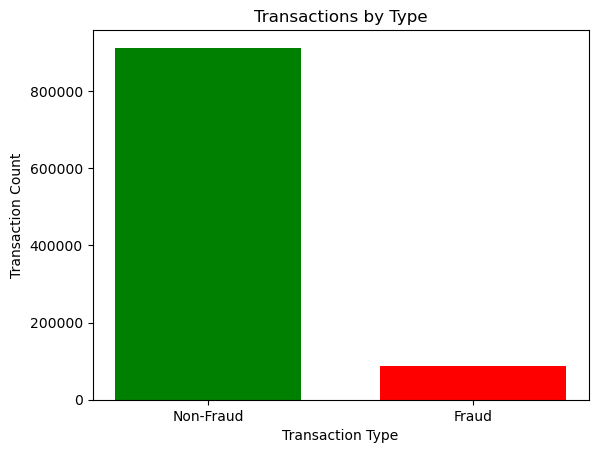

In [15]:
categories = ["Non-Fraud", "Fraud"]
xpos = np.array([0, 1])
plt.xticks(xpos, categories)
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Count")
plt.title("Transactions by Type")
plt.bar(xpos[0], nf_count, width= 0.7, color = "g")
plt.bar(xpos[1], f_count, width = 0.7, color="r")

([<matplotlib.patches.Wedge at 0x1ae206141f0>,
 [Text(-1.058791700494653, 0.29826185636725505, 'Non-Fraud'),
  Text(1.1550454914487123, -0.3253765705824602, 'Fraud')],
 [Text(-0.5775227457243561, 0.16268828529123003, '91.26%'),
  Text(0.6737765366784155, -0.1898029995064351, '8.74%')])

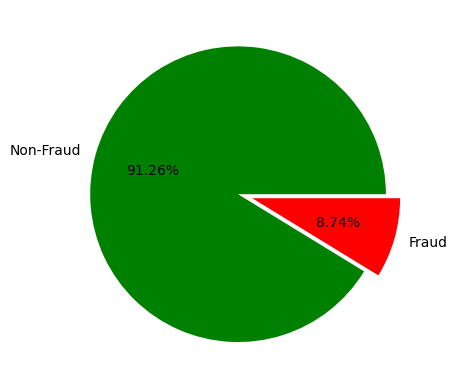

In [16]:
plt.pie(data["fraud"].value_counts(), labels = categories, autopct = "%.2f%%", explode= (0, 0.1), colors = ("g", "r"))

As it can be seen from the charts, number of fraud transactions are significantly low when compared to non-fraud transactions. We will inspect this issue later. First, let's take a further look at the fraud transactions.

# More detailed discription of fraud data.

In [17]:
fraud_df = data[data["fraud"] == 1]

In [18]:
fraud_df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.0
mean,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318,1.0
std,134.391608,47.997697,5.564320,0.324825,0.436647,0.055801,0.225391,0.0
min,0.025847,0.000407,0.011966,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.585729,0.328199,3.500270,1.000000,0.000000,0.000000,1.000000,1.0
50%,15.454219,1.157631,5.071294,1.000000,0.000000,0.000000,1.000000,1.0
75%,101.110104,4.598504,7.331222,1.000000,1.000000,0.000000,1.000000,1.0
max,10632.723672,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.0


<AxesSubplot:xlabel='online_order', ylabel='count'>

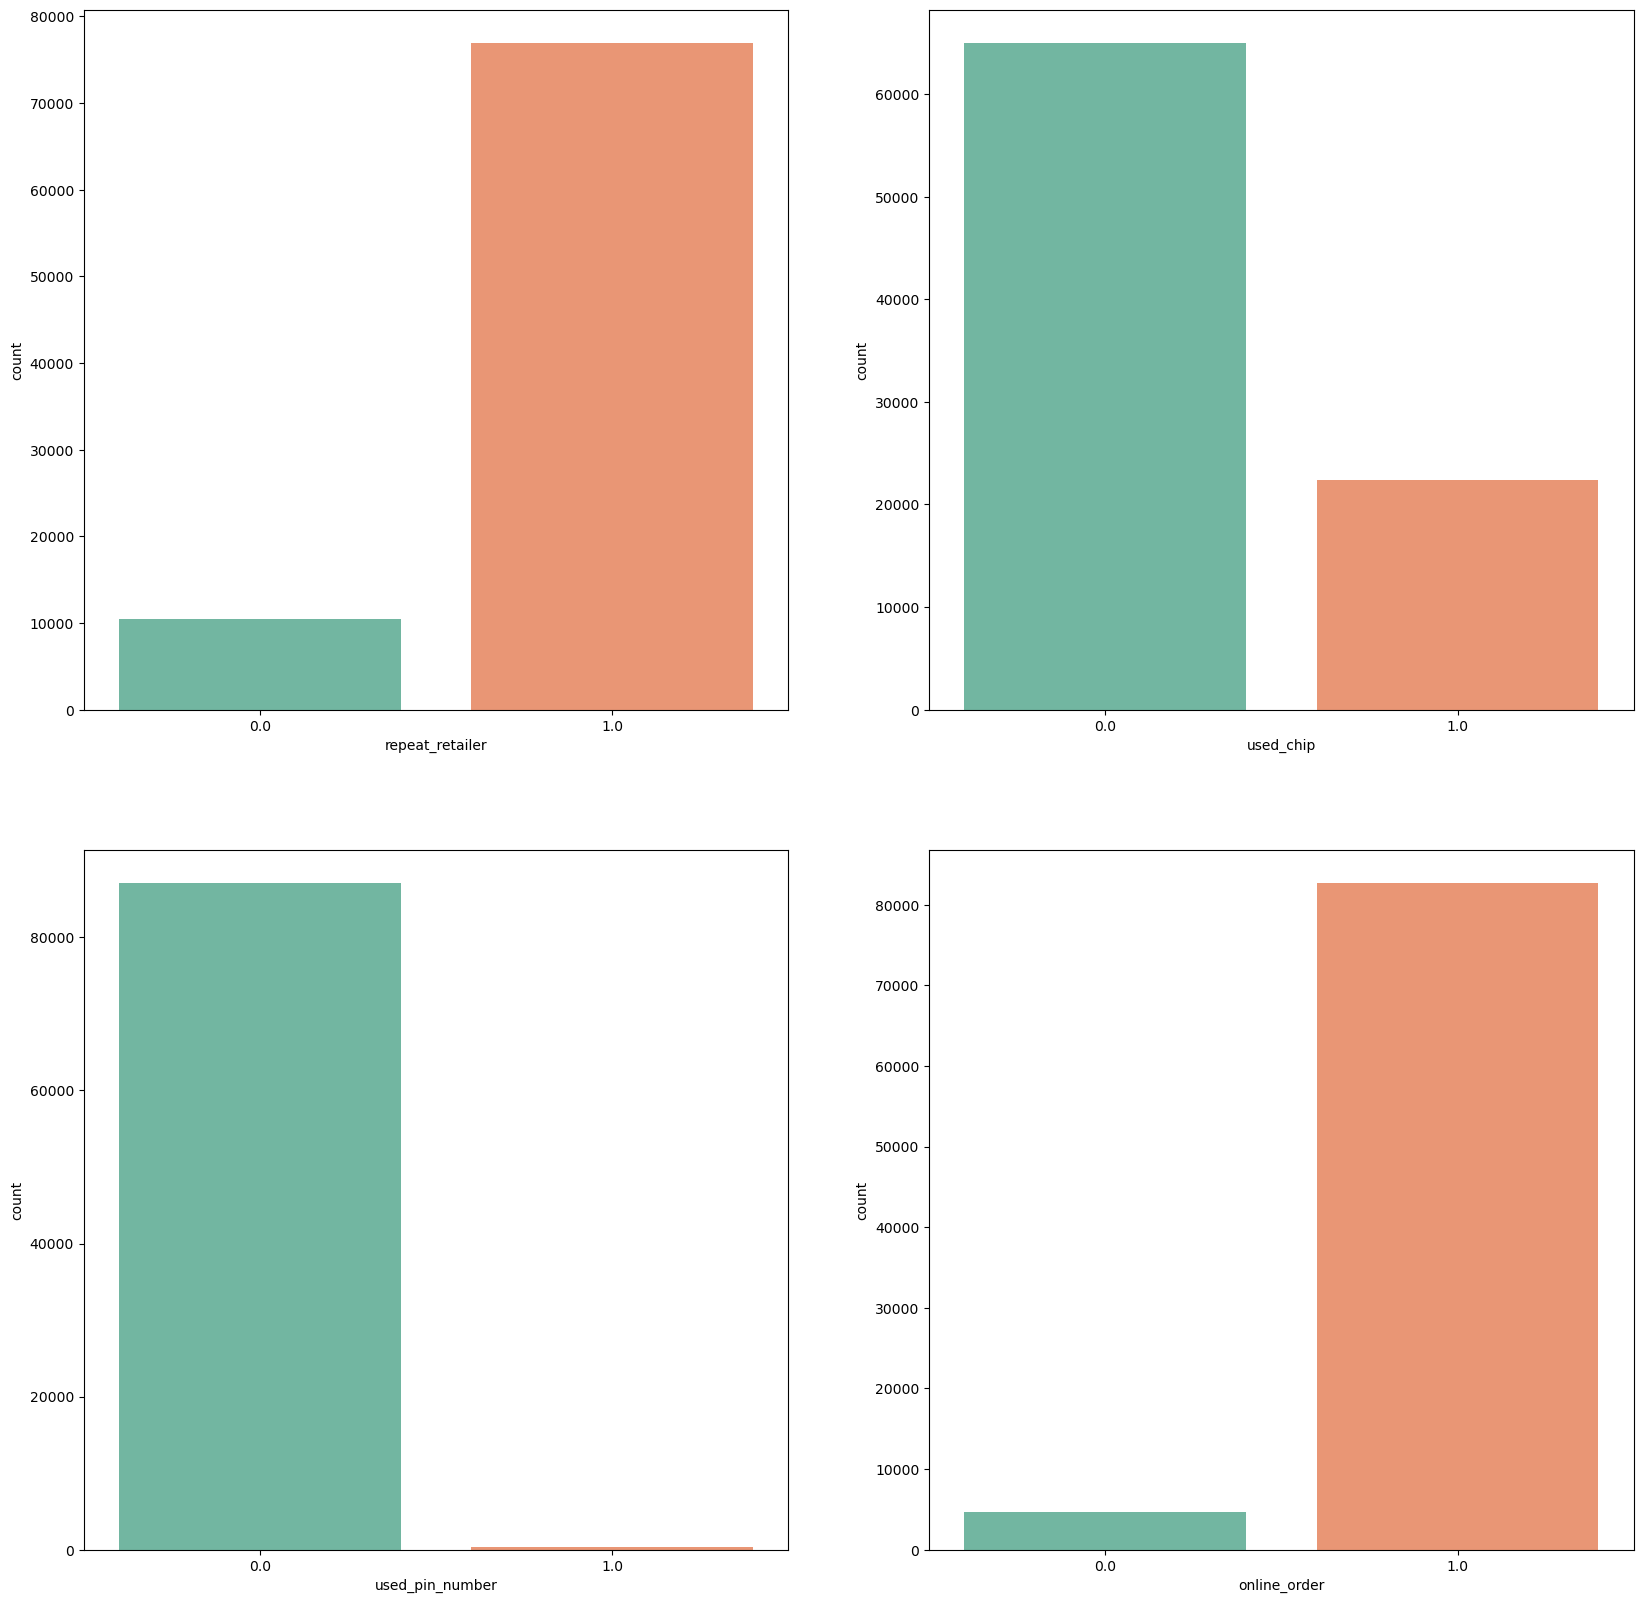

In [19]:
plt.figure(figsize = (20,20))

plt.subplot(2,2,1)
sns.countplot(x = "repeat_retailer", palette = "Set2", data = fraud_df)

plt.subplot(2,2,2)
sns.countplot(x = "used_chip", palette = "Set2", data = fraud_df)

plt.subplot(2,2,3)
sns.countplot(x = "used_pin_number", palette = "Set2", data = fraud_df)

plt.subplot(2,2,4)
sns.countplot(x = "online_order", palette = "Set2", data = fraud_df)

Text(0.5, 1.0, 'Was the transaction online?')

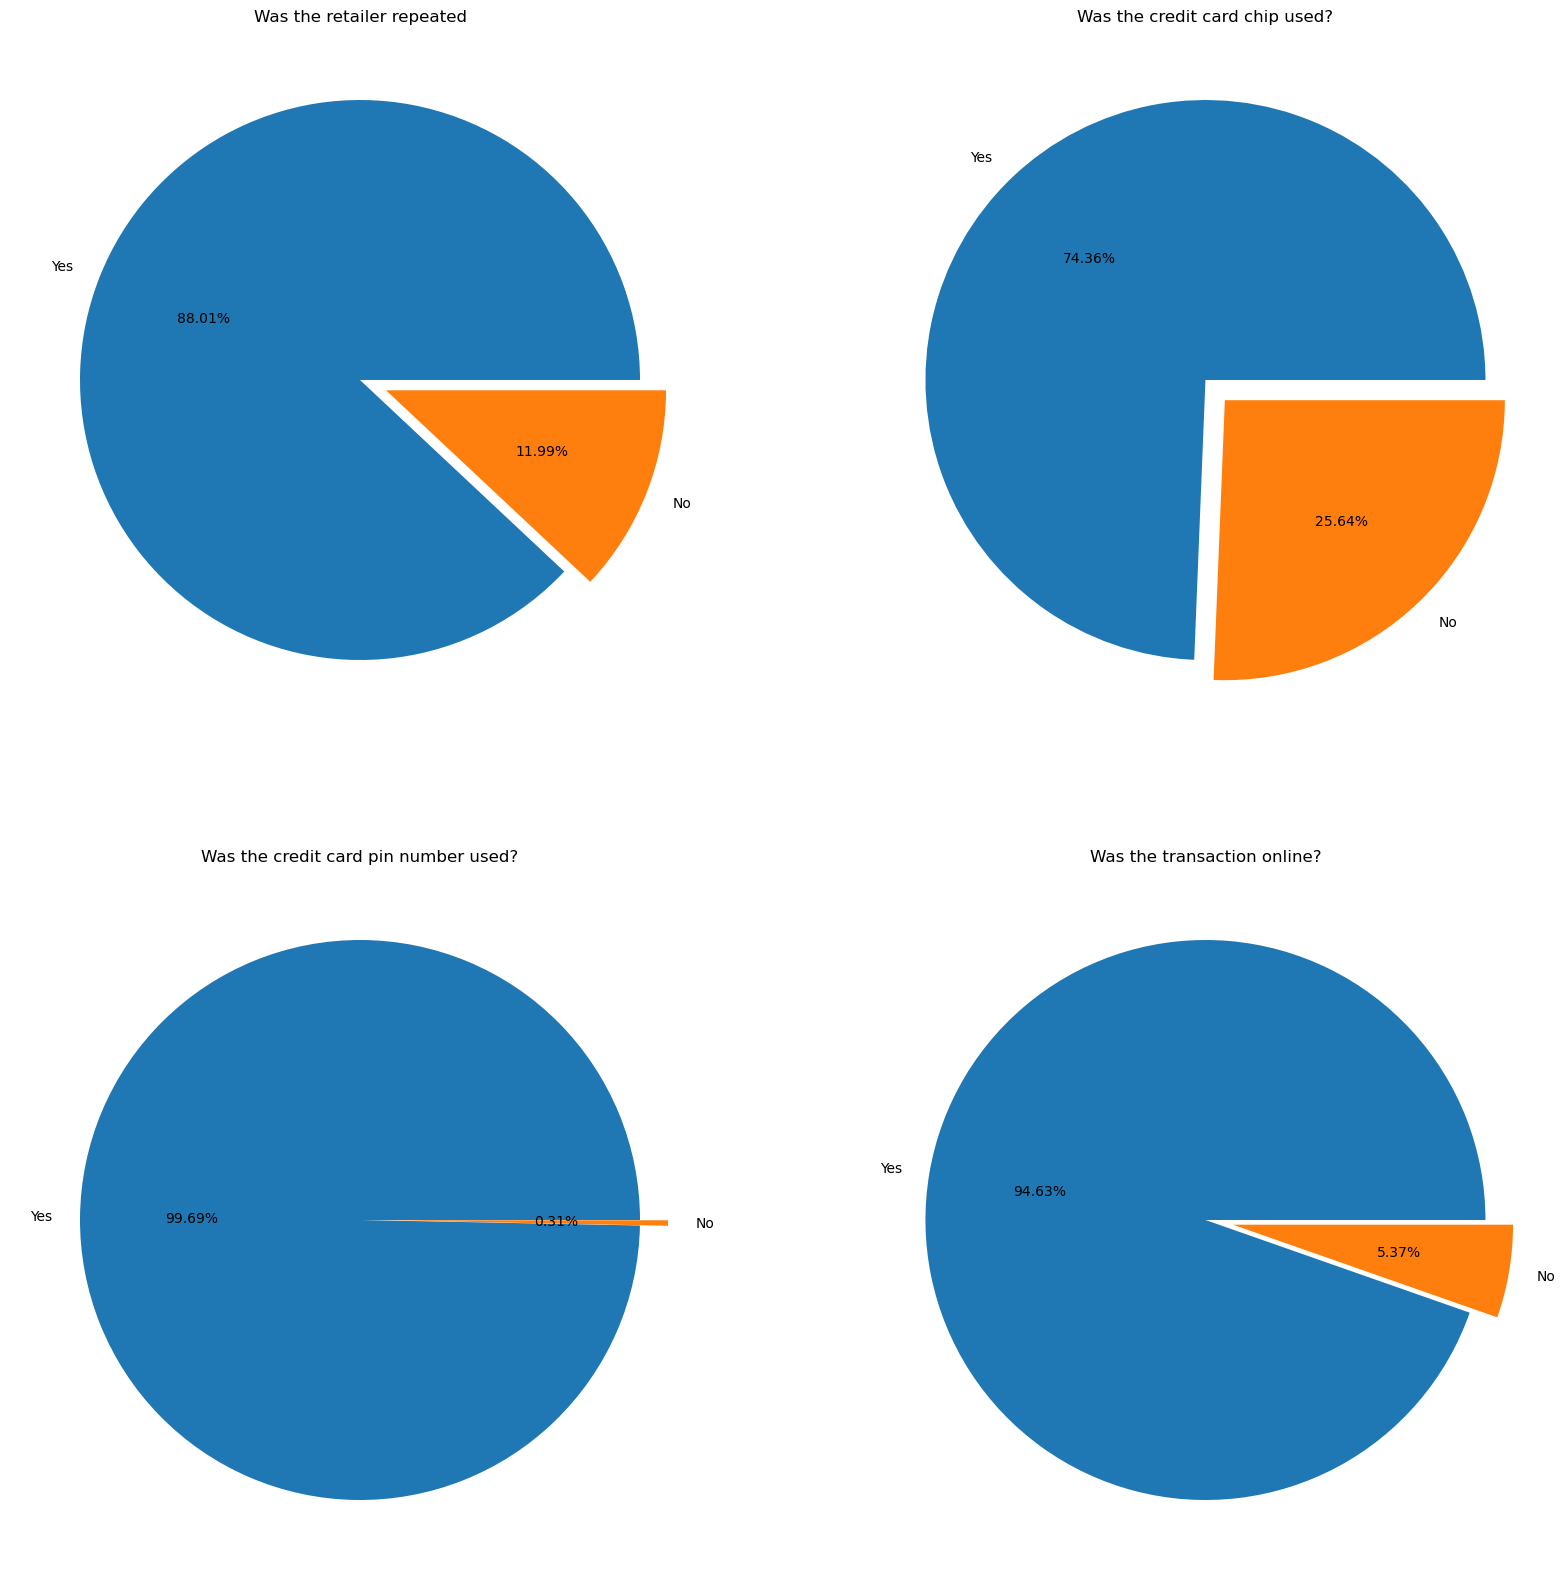

In [20]:
plt.figure(figsize = (20,20))

plt.subplot(2,2,1)
plt.pie(fraud_df["repeat_retailer"].value_counts(), labels = ("Yes", "No"), autopct = "%.2f%%", explode = (0, 0.1))
plt.title("Was the retailer repeated")

plt.subplot(2,2,2)
plt.pie(fraud_df["used_chip"].value_counts(), labels = ("Yes", "No"), autopct = "%.2f%%", explode = (0, 0.1))
plt.title("Was the credit card chip used?")

plt.subplot(2,2,3)
plt.pie(fraud_df["used_pin_number"].value_counts(), labels = ("Yes", "No"), autopct = "%.2f%%", explode = (0, 0.1))
plt.title("Was the credit card pin number used?")

plt.subplot(2,2,4)
plt.pie(fraud_df["online_order"].value_counts(), labels = ("Yes", "No"), autopct = "%.2f%%", explode = (0, 0.1))
plt.title("Was the transaction online?")

## When we look at the categoric variables for fraud transactions, we can safely say that almost all of the fraud transactions were online did not use pin number. These key points will be important when creating a model.

<AxesSubplot:xlabel='ratio_to_median_purchase_price', ylabel='fraud'>

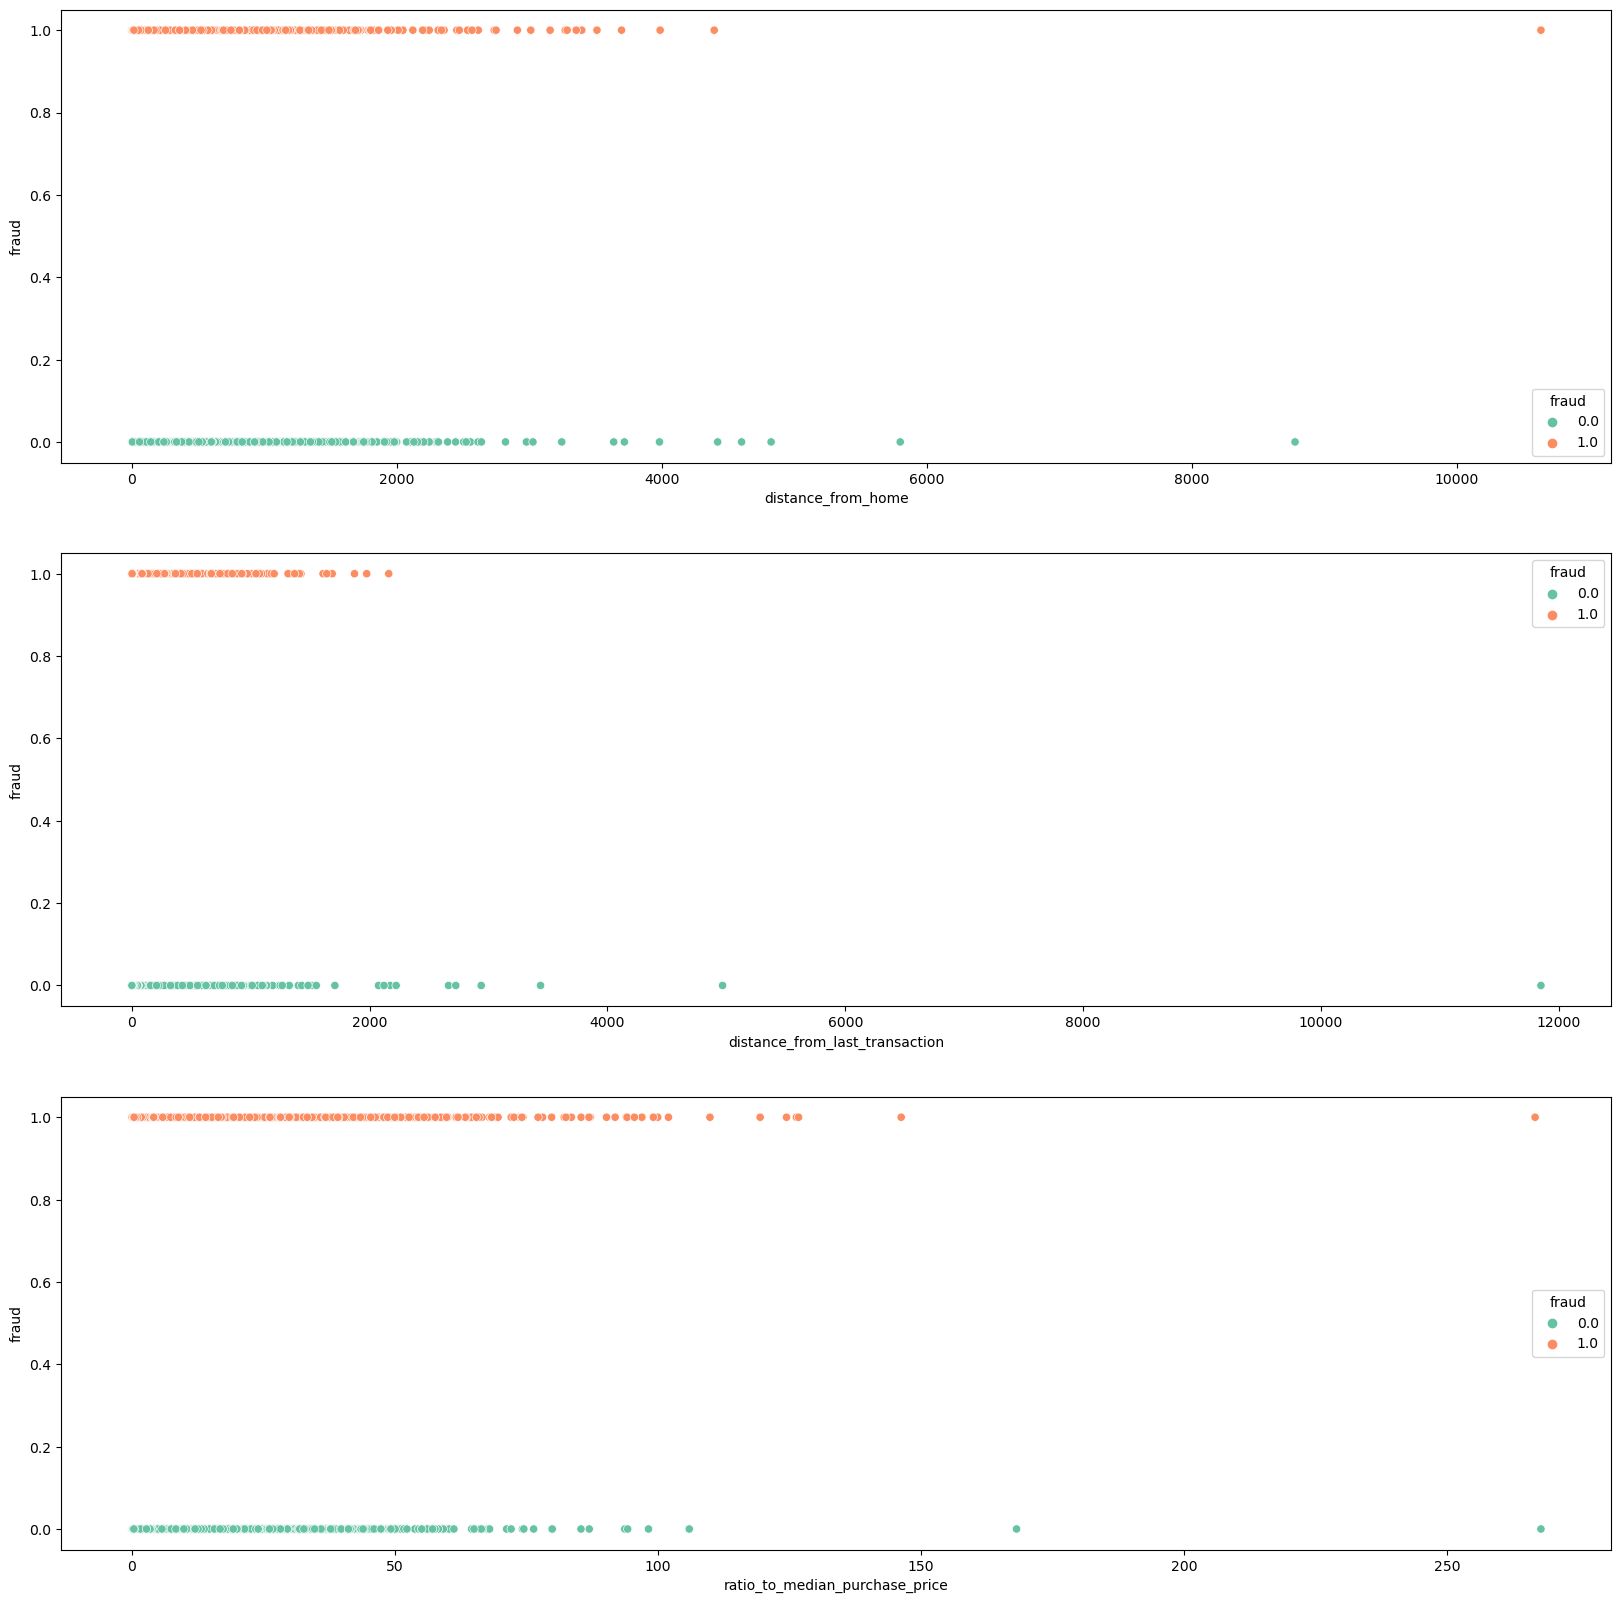

In [21]:
plt.figure(figsize = (20,20))

plt.subplot(3,1,1)
sns.scatterplot(y = "fraud", x = "distance_from_home", palette = "Set2", data = data, hue = "fraud")

plt.subplot(3,1,2)
sns.scatterplot(y = "fraud", x = "distance_from_last_transaction", palette = "Set2", data = data, hue = "fraud")

plt.subplot(3,1,3)
sns.scatterplot(y = "fraud", x = "ratio_to_median_purchase_price", palette = "Set2", data = data, hue = "fraud")

#### There is no significant difference for the non-categoric variables based on their fraud value.
#### there are significantly less fraud transaction data than non-fraud transaction data. It is possible to "fix" this by lowering non-fraud transactions or increasing fraud transactions. In this study, increasing fraud transaction will be used by SMOTE (Synthetic Minority Oversampling Technique)

## Through this analysis we can come to a conclusion that,

### ->The categorical data in this dataset such as  repeat_retailer, used_chip, used_pin_number, online_order - tells us the fraud transaction was noticed the most when the trancation was made to a repeated retailer, it was noticed that most of the fraudulent transaction occured during online transaction and when the user did not use their credit card chip and when the user did not use their credit card pin for transaction

## Any suspicious transaction should be paused before the money is transfered, in order to stop the fraudlent transaction.

### ->The non categorical data in this dataset such as distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price does not show any significant difference on identifying the fraudulent transaction, this migiht be because in our dataset the number of fraud trancation(87403) is lesser than number of normal transaction(912597).

In [22]:
plt.style.use('fivethirtyeight')

# Exploratory Data Analysis

In [23]:
eda_df = data.copy()

#### Before Analyzing the data, I am normalizing the data so that it would be good for visualization since the range of features differ greatly.

In [24]:
scaler_eda = MinMaxScaler()
eda_df[eda_df.columns] = scaler_eda.fit_transform(eda_df)

In [25]:
eda_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.005443,0.000026,0.007250,1.0,1.0,0.0,0.0,0.0
1,0.001018,0.000015,0.004816,1.0,0.0,0.0,0.0,0.0
2,0.000478,0.000068,0.001581,1.0,0.0,0.0,1.0,0.0
3,0.000211,0.000473,0.001338,1.0,1.0,0.0,1.0,0.0
4,0.004156,0.000048,0.008284,1.0,1.0,0.0,1.0,0.0


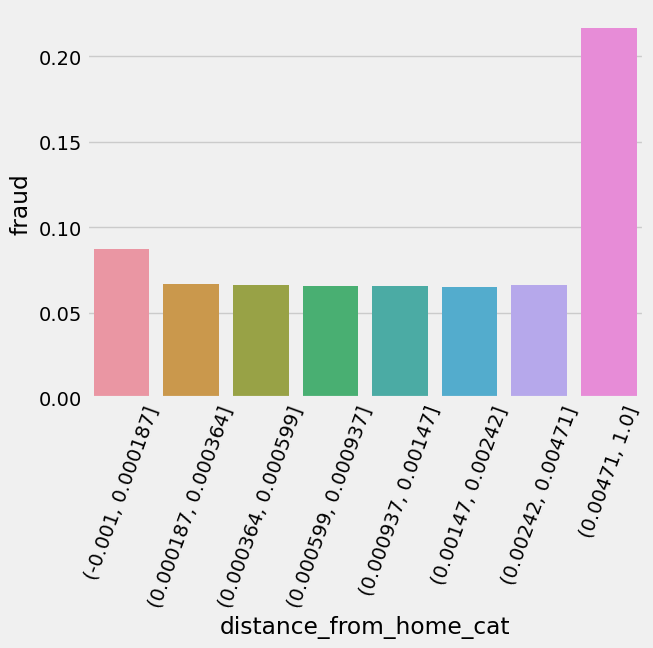

In [26]:
eda_df['distance_from_home_cat'] = pd.qcut(eda_df.distance_from_home,8)
bar = eda_df.groupby(by='distance_from_home_cat').mean()
sns.barplot(data=bar, x=bar.index, y='fraud');
plt.xticks(rotation=70);

#### The above bar graph shows that the probability of fraud remains constant as the distance increases but at a certain distance, the probability spikes from 5% to 35%.

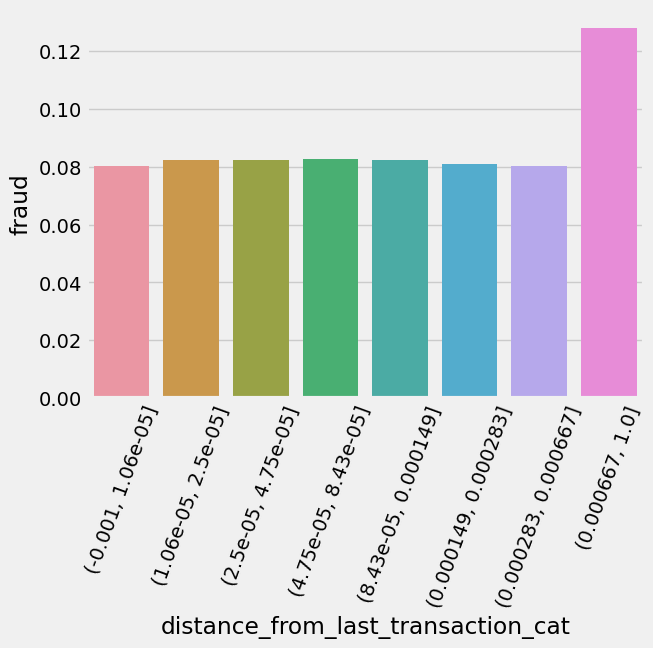

In [27]:
eda_df['distance_from_last_transaction_cat'] = pd.qcut(eda_df.distance_from_last_transaction,8)
bar = eda_df.groupby(by='distance_from_last_transaction_cat').mean()
sns.barplot(data=bar, x=bar.index, y='fraud');
plt.xticks(rotation=70);

#### The probability of fraud increases as the distance from last transaction increases as shown in the above graph.

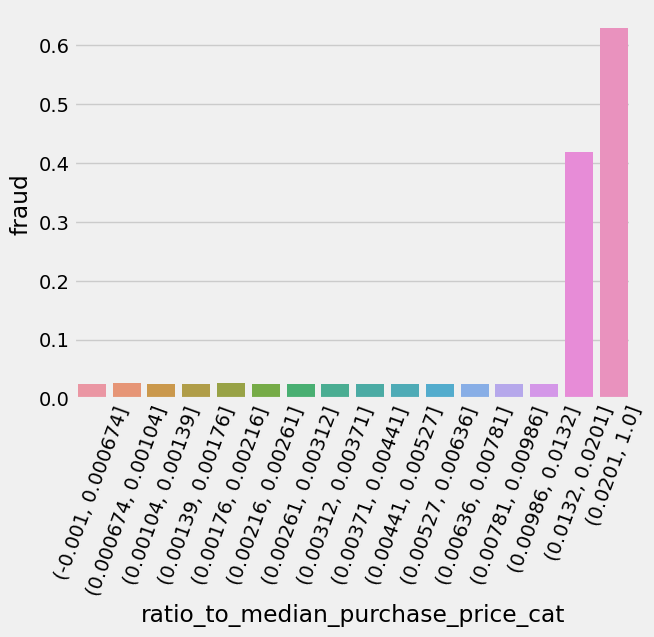

In [28]:
eda_df['ratio_to_median_purchase_price_cat'] = pd.qcut(eda_df.ratio_to_median_purchase_price,16)
bar = eda_df.groupby(by='ratio_to_median_purchase_price_cat').mean()
sns.barplot(data=bar, x=bar.index, y='fraud');
plt.xticks(rotation=70);

#### The above bar graph shows that the probability of fraud remains constant as the distance increases but at a certain distance, the probability spikes from less than 3% all the way to 40% and then to more than 60%.

# Conclusions from Exploratory Data Analysis


### 1)The probability of fraud remains constant as the distance from home increases but at a certain distance, the probability spikes to its maximum value.
### 2)The probability of fraud increases as the distance from last transaction increases.
### 3)Higher ratio to median purchase price increases the probability of fraud.
### 4)Used Pin Number transactions are less likely to be a fraud.
### 5)Din't use chip for transactions are more likely to be a fraud.

# Building Machine Learning Models

In [29]:
input_cols = ['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order']
target_col = 'fraud'

In [32]:
train_x, test_x, train_y, test_y = train_test_split(data[input_cols], data[target_col], test_size = 0.3)

## 1. Building LogisticRegression Model

In [33]:
lr = LogisticRegression()
lr.fit(train_x,train_y)
print(classification_report(train_y,lr.predict(train_x)))
print('---------------------------------------------------------')
print(classification_report(test_y,lr.predict(test_x)))

C:\Users\Ancy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    638735
         1.0       0.89      0.60      0.72     61265

    accuracy                           0.96    700000
   macro avg       0.93      0.80      0.85    700000
weighted avg       0.96      0.96      0.95    700000

---------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273862
         1.0       0.89      0.60      0.72     26138

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.96    300000



## 2. Building KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x,train_y)
print(classification_report(train_y,knn.predict(train_x)))
print('---------------------------------------------------------')
print(classification_report(test_y,knn.predict(test_x)))

C:\Users\Ancy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    638735
         1.0       0.93      0.96      0.95     61265

    accuracy                           0.99    700000
   macro avg       0.97      0.98      0.97    700000
weighted avg       0.99      0.99      0.99    700000

---------------------------------------------------------


C:\Users\Ancy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    273862
         1.0       0.89      0.92      0.91     26138

    accuracy                           0.98    300000
   macro avg       0.94      0.96      0.95    300000
weighted avg       0.98      0.98      0.98    300000



### 3. Building a Decision Tree Classifier

In [35]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_x,train_y)
print(classification_report(train_y,dt.predict(train_x)))
print('---------------------------------------------------------')
print(classification_report(test_y,dt.predict(test_x)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    638735
         1.0       1.00      1.00      1.00     61265

    accuracy                           1.00    700000
   macro avg       1.00      1.00      1.00    700000
weighted avg       1.00      1.00      1.00    700000

---------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273862
         1.0       1.00      1.00      1.00     26138

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



### CONFUSION MATRIX FOR DECISION TREE

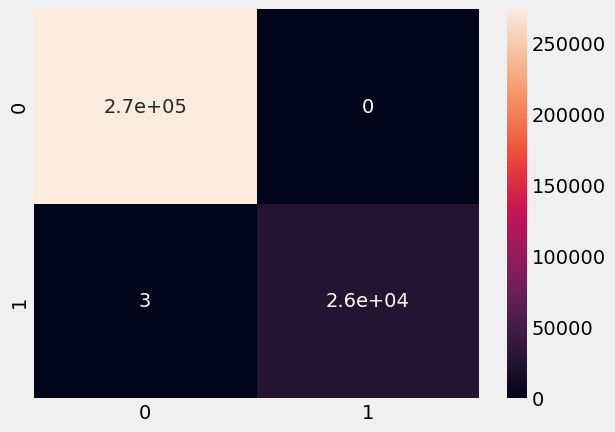

In [36]:
sns.heatmap(confusion_matrix(test_y,dt.predict(test_x)), annot=True);

## The Decision Tree is the best model for this situvation.
## We recived o False Positives and 3 False Negatives,
## With the 100% Accuracy and 100% F1 score.

# AREA UNDER THE ROC CURVE (AUC)

### The higher the area under the ROC curve (AUC), the better the classifier. A classifier with an AUC higher than 0.5 is better than a random classifier. If AUC is lower than 0.5, then something is wrong with your model. A perfect classifier would have an AUC of 1.

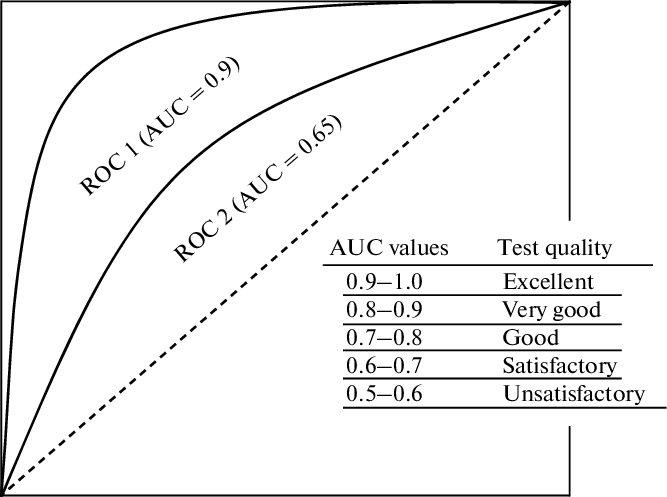

#### ROC curve capture more than one aspect of the classification (by taking both false positives and negatives into account) and allow visually and with low effort comparing the performance of different models.

# LET'S CHECK ROC CURVE(AUC) FOR OUR DATASET

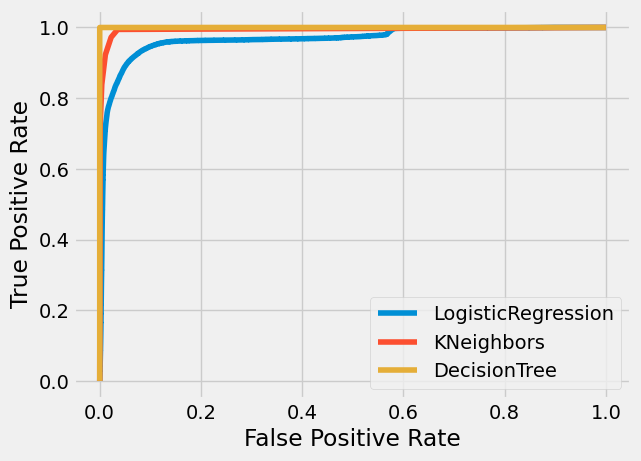

In [37]:
lr_x,lr_y,_ = roc_curve(test_y,lr.predict_proba(test_x)[:,1])
knn_x,knn_y,_ = roc_curve(test_y,knn.predict_proba(test_x)[:,1])
dt_x,dt_y,_ = roc_curve(test_y,dt.predict_proba(test_x)[:,1])

plt.plot(lr_x,lr_y,label='LogisticRegression')
plt.plot(knn_x,knn_y,label='KNeighbors')
plt.plot(dt_x,dt_y,label='DecisionTree')
plt.legend();
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

### A perfect ROC AUC curve was achieved for Decision Tree Classifier.